L'objectif ici est de décomposer les journées en plage horaire de 3 heures et prédire des paramètres de naturalité en invoquant des modèles univairiés.

In [12]:
# Utiliser le drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
import pandas as pd

# Importer les données pré-calculées
df_00 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/00_02.csv')
df_03 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/03_05.csv')
df_06 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/06_08.csv')
df_09 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/09_11.csv')
df_12 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/12_14.csv')
df_15 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/15_17.csv')
df_18 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/18_20.csv')
df_21 = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/regression/regression_creneaux/plage_3_heures/21_23.csv')

# Se débarrasser de la colonne file_name qui devient inutile pour l'étude
df_00.drop(columns=['file_name'], inplace = True)
df_03.drop(columns=['file_name'], inplace = True)
df_06.drop(columns=['file_name'], inplace = True)
df_09.drop(columns=['file_name'], inplace = True)
df_12.drop(columns=['file_name'], inplace = True)
df_15.drop(columns=['file_name'], inplace = True)
df_18.drop(columns=['file_name'], inplace = True)
df_21.drop(columns=['file_name'], inplace = True)

# Vérifier que la décompostion s'est bien passée
print(df_00.shape[0] + df_03.shape[0] + df_06.shape[0] + df_09.shape[0] + df_12.shape[0] + df_15.shape[0] + df_18.shape[0] + df_21.shape[0] == 29440)

True


In [14]:
# Centrer et réduire la donnée
df_00 = (df_00 - df_00.mean()) / df_00.std()
df_03 = (df_03 - df_03.mean()) / df_03.std()
df_06 = (df_06 - df_06.mean()) / df_06.std()
df_09 = (df_09 - df_09.mean()) / df_09.std()
df_12 = (df_12 - df_12.mean()) / df_12.std()
df_15 = (df_15 - df_15.mean()) / df_15.std()
df_18 = (df_18 - df_18.mean()) / df_18.std()
df_21 = (df_21 - df_21.mean()) / df_21.std()

# Créer un dictionnaire de dataframes
dfs = {}
dfs['00'] = df_00
dfs['03'] = df_03
dfs['06'] = df_06
dfs['09'] = df_09
dfs['12'] = df_12
dfs['15'] = df_15
dfs['18'] = df_18
dfs['21'] = df_21

# Fonction qui repère les colonnes d'un dataframe avec des NaN
def detecteur_NaN(df):
  if df.isna().any().any():
    columns_with_nan = df.columns[df.isna().any()].tolist()
    print("Les colonnes qui contiennent des NaN : ", columns_with_nan)

# Pour chaque créneau horaire, regarder s'il y a des valeurs avec des NaN
for cle, valeur in dfs.items():
    print(cle)
    detecteur_NaN(dfs[cle])
    print()

00
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

03
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

06
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

09
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

12
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

15
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

18
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']

21
Les colonnes qui contiennent des NaN :  ['ice_and_snow_cover_100', 'ice_and_snow_cover_250']



In [15]:
# Au des résultats, nous allons abandonner l'information sur la glace et la neige
for cle in dfs:
  dfs[cle].drop(columns=['ice_and_snow_cover_100', 'ice_and_snow_cover_250', 'ice_and_snow_cover_500'], inplace = True)

In [16]:
liste_predicteurs = [ 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                      'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                      'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                      'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                      'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                      'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover']

print(len(liste_predicteurs) == 60) # Vérifier qu'il y a le bon nombre de prédicteurs

True


In [17]:
from sklearn.metrics import make_scorer

# Fonction qui donne l'erreur relative (à utiliser dans la validation croisée)
def scoring(y_true, y_pred):
  return np.mean(np.abs((y_pred - y_true) / y_true) * 100)

# Make your custom scoring function into a scorer object
custom_scorer = make_scorer(scoring)

# Taille de buffer = 100

In [ ]:
liste_a_predire = [ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                    'grass_and_shub_cover_100', 'deciduous_forest_cover_100', 'coniferous_forest_cover_100', 'mineral_cover_100',
                    'water_cover_100', 'mean_naturalness_100', 'std_naturalness_100']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy import stats

# dictionnaire contenant les métriques de chaque cible pour chaque créneau horaire
dic100 = {}

# Pour chaque horaire, entraîner un unique modèle sur un paramètre
for cle in dfs:

  print('Horaire :', cle)
  print('==========================================================================')

  # Séparer les prédicteurs des cibles
  df_predicteurs = dfs[cle][liste_predicteurs]
  df_cibles = dfs[cle][liste_a_predire]

  # dictionnaire contenant l'erreur relative moyenne de chaque cible ainsi que l'intervalle de confiance associé
  dico = {}

  for cible in df_cibles.columns:

    # Utiliser un modèle Random Forest
    model = RandomForestRegressor()

    # Cross-validation
    cv_scores = cross_val_score(model, df_predicteurs, df_cibles[cible], cv=5, scoring=custom_scorer)

    # Calcul de l'erreur relative moyenne et de l'écart-type associé
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)

    # Calcul de l'intervalle de confiance (t-distribution)
    confidence_interval = stats.t.interval(0.95, len(cv_scores)-1, loc=mean_score, scale=std_score/np.sqrt(len(cv_scores)))

    dico[cible] = [mean_score, confidence_interval]

    print(cible, [mean_score, confidence_interval])

    print('--------------------------------------------------------------------------------')

  dic100[cle] = dico

Horaire : 00
total_edge_length_100 [181.51880679285424, (111.72197420243862, 251.31563938326985)]
--------------------------------------------------------------------------------
edge_density_100 [175.99848962387503, (107.98475042660321, 244.01222882114683)]
--------------------------------------------------------------------------------
Shannon_landscape_diversity_100 [160.29202172002414, (32.18379986089769, 288.4002435791506)]
--------------------------------------------------------------------------------
grass_and_shub_cover_100 [188.8189674252182, (117.76118742379337, 259.876747426643)]
--------------------------------------------------------------------------------
deciduous_forest_cover_100 [107.33677375081785, (94.63732469512564, 120.03622280651007)]
--------------------------------------------------------------------------------
coniferous_forest_cover_100 [238.45682915246078, (-81.02626361478616, 557.9399219197078)]
------------------------------------------------------------

Afficher l'error plot pour chaque cible

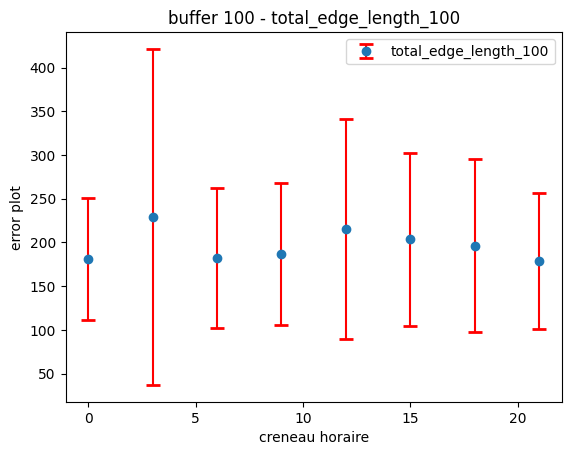

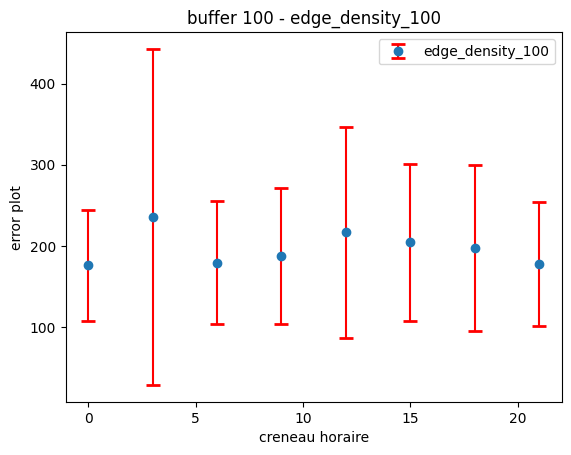

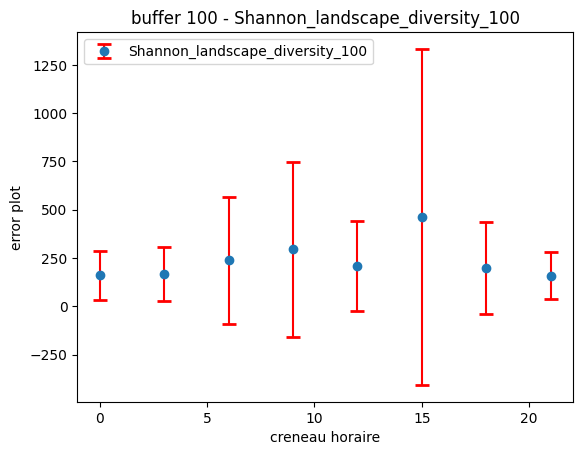

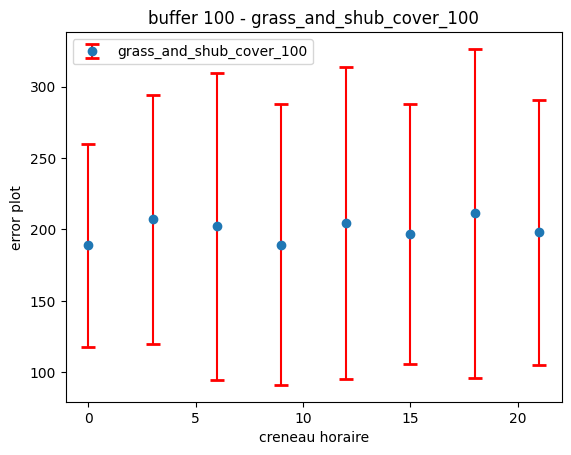

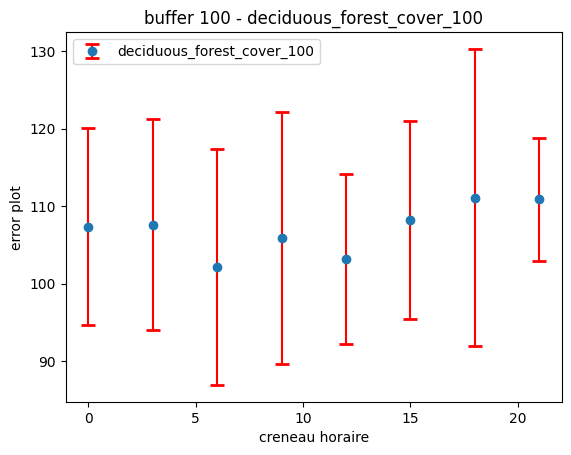

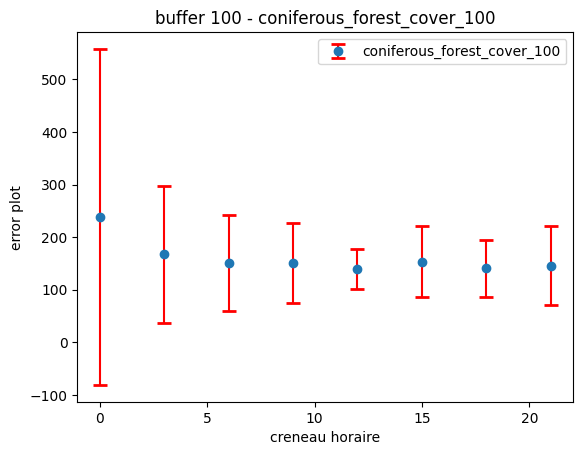

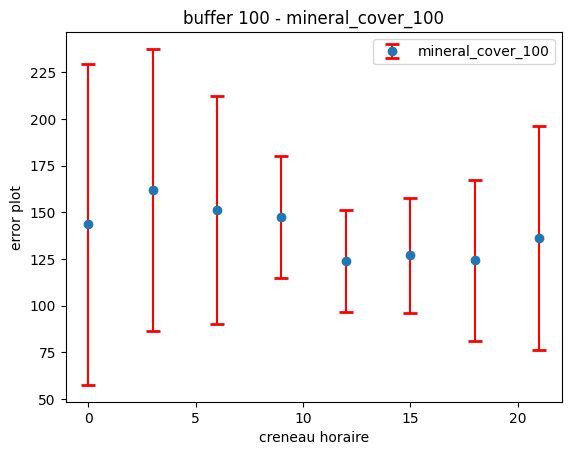

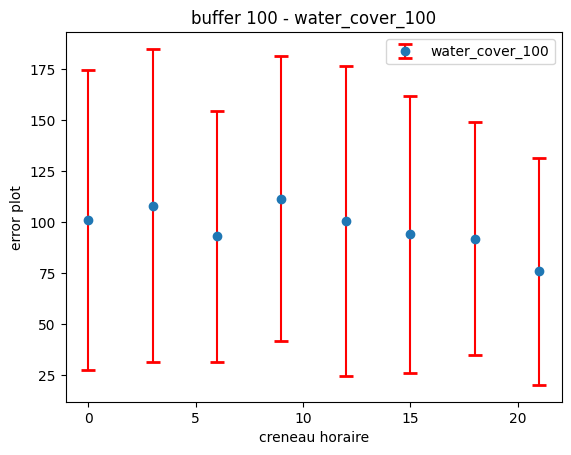

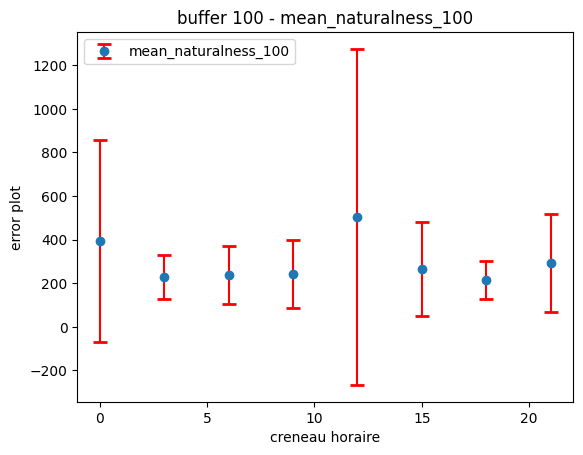

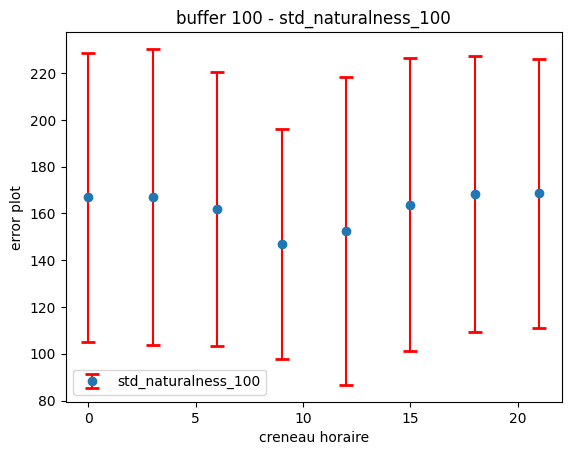

In [ ]:
import matplotlib.pyplot as plt

# plages créneaux horaire
x = [0, 3, 6, 9, 12, 15, 18, 21]

# Pour chaque cible, afficher les errors plot pour chaque créneau horaire
for cible in df_cibles.columns:

  # moyenne erreur relative
  y = []

  # intervalle de confiance
  lower_errors = []
  upper_errors = []

  # Pour chaque horaire, obtenir les métriques de la cible
  for value in dic100.values():

    y.append(value[cible][0])
    lower_errors.append(value[cible][0] - value[cible][1][0])
    upper_errors.append(value[cible][1][1] - value[cible][0])


  plt.figure()

  # Plot data points with error bars
  plt.errorbar(x, y, yerr=[lower_errors, upper_errors], label=cible, fmt='o', capsize=5, capthick=2, ecolor='red')

  # Add labels and title
  plt.xlabel('creneau horaire')
  plt.ylabel('error plot')
  plt.title(f'buffer 100 - {cible}')

  plt.legend()

# Show plot
plt.show()

# Taille de buffer = 250

In [18]:
liste_a_predire = [ 'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                    'grass_and_shub_cover_250', 'deciduous_forest_cover_250', 'coniferous_forest_cover_250', 'mineral_cover_250',
                    'water_cover_250', 'mean_naturalness_250', 'std_naturalness_250']

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy import stats

# dictionnaire contenant les métriques de chaque cible pour chaque créneau horaire
dic250 = {}

# Pour chaque horaire, entraîner un unique modèle sur un paramètre
for cle in dfs:

  print('Horaire :', cle)
  print('==========================================================================')

  # Séparer les prédicteurs des cibles
  df_predicteurs = dfs[cle][liste_predicteurs]
  df_cibles = dfs[cle][liste_a_predire]

  # dictionnaire contenant l'erreur relative moyenne de chaque cible ainsi que l'intervalle de confiance associé
  dico = {}

  for cible in df_cibles.columns:

    # Utiliser un modèle Random Forest
    model = RandomForestRegressor()

    # Cross-validation
    cv_scores = cross_val_score(model, df_predicteurs, df_cibles[cible], cv=5, scoring=custom_scorer)

    # Calcul de l'erreur relative moyenne et de l'écart-type associé
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)

    # Calcul de l'intervalle de confiance (t-distribution)
    confidence_interval = stats.t.interval(0.95, len(cv_scores)-1, loc=mean_score, scale=std_score/np.sqrt(len(cv_scores)))

    dico[cible] = [mean_score, confidence_interval]

    print(cible, [mean_score, confidence_interval])

    print('--------------------------------------------------------------------------------')

  dic250[cle] = dico

Horaire : 00
total_edge_length_250 [217.85411813072977, (93.14007264768479, 342.56816361377474)]
--------------------------------------------------------------------------------
edge_density_250 [211.33533733433177, (94.17318354466163, 328.4974911240019)]
--------------------------------------------------------------------------------
Shannon_landscape_diversity_250 [126.38530441600369, (100.79081405102184, 151.97979478098554)]
--------------------------------------------------------------------------------
grass_and_shub_cover_250 [200.10551579738524, (145.1596661404621, 255.05136545430838)]
--------------------------------------------------------------------------------
deciduous_forest_cover_250 [191.42099043436681, (16.95265243440221, 365.88932843433145)]
--------------------------------------------------------------------------------
coniferous_forest_cover_250 [210.9818653887468, (109.56013972469265, 312.40359105280095)]
-----------------------------------------------------------

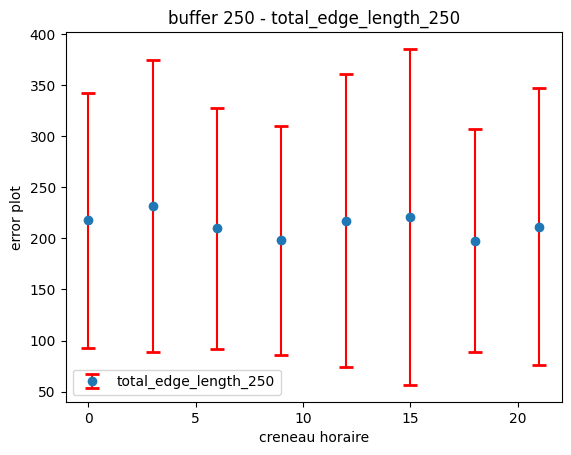

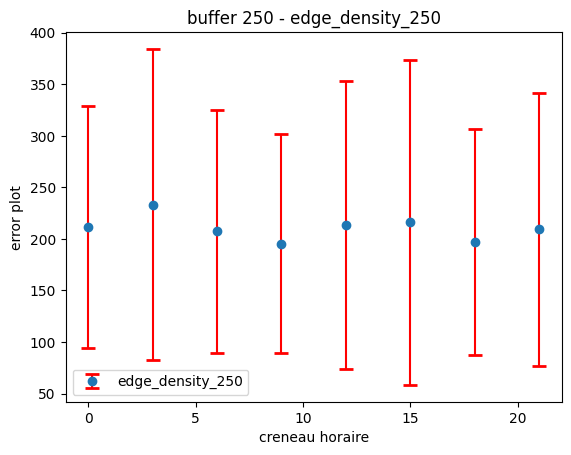

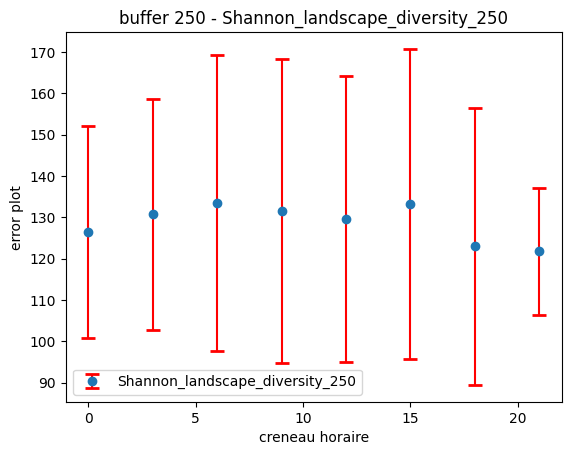

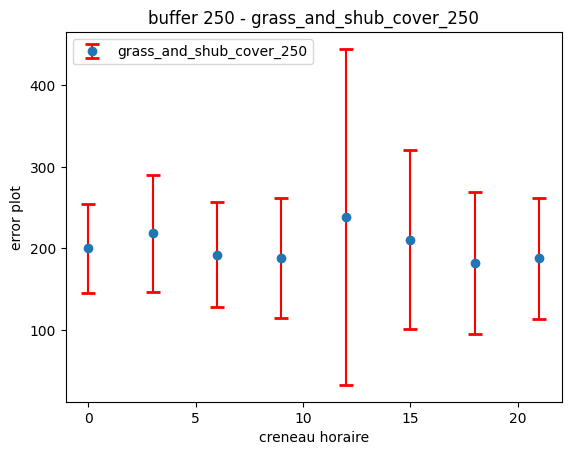

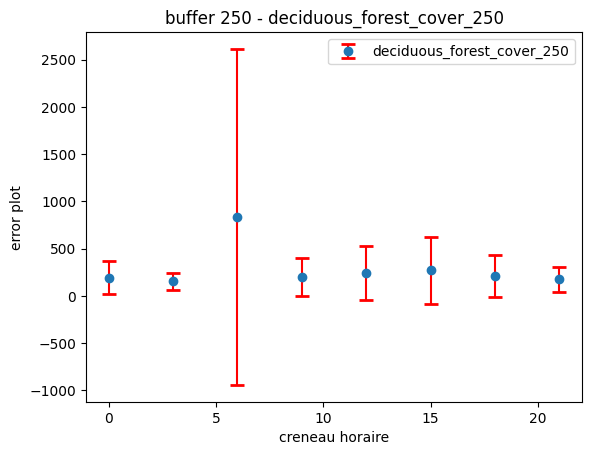

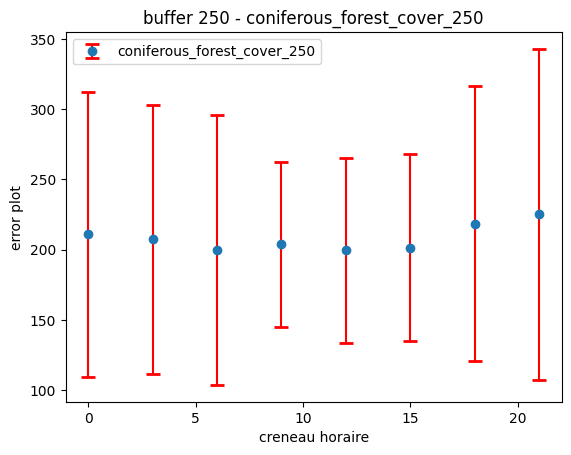

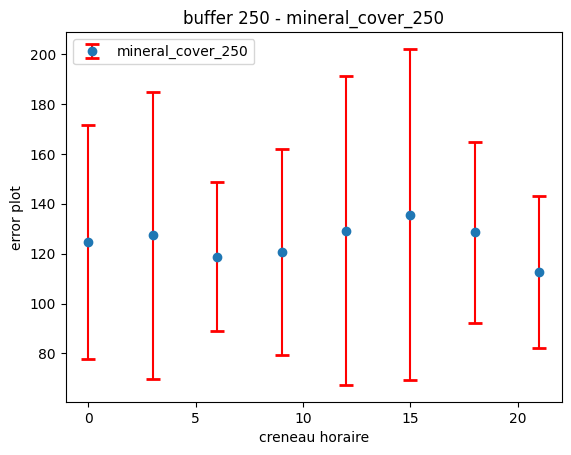

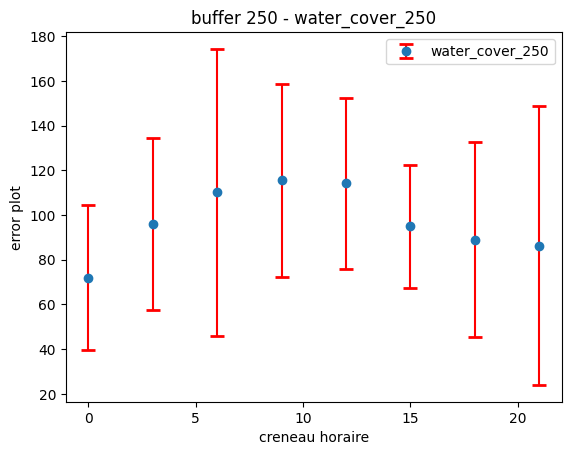

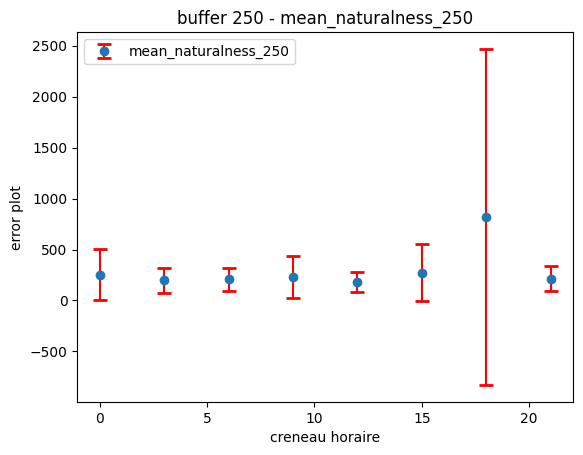

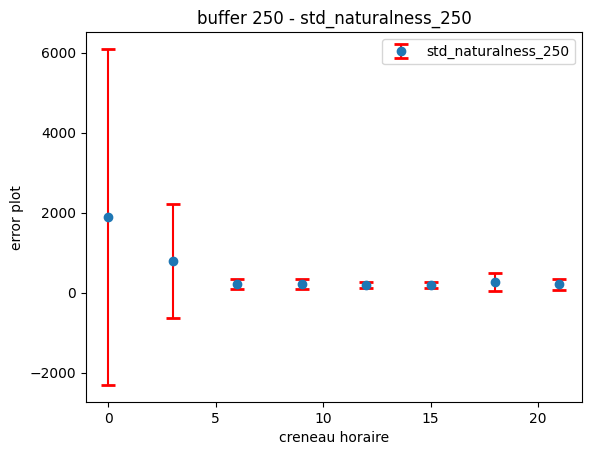

In [20]:
import matplotlib.pyplot as plt

# plages créneaux horaire
x = [0, 3, 6, 9, 12, 15, 18, 21]

# Pour chaque cible, afficher les errors plot pour chaque créneau horaire
for cible in df_cibles.columns:

  # moyenne erreur relative
  y = []

  # intervalle de confiance
  lower_errors = []
  upper_errors = []

  # Pour chaque horaire, obtenir les métriques de la cible
  for value in dic250.values():

    y.append(value[cible][0])
    lower_errors.append(value[cible][0] - value[cible][1][0])
    upper_errors.append(value[cible][1][1] - value[cible][0])


  plt.figure()

  # Plot data points with error bars
  plt.errorbar(x, y, yerr=[lower_errors, upper_errors], label=cible, fmt='o', capsize=5, capthick=2, ecolor='red')

  # Add labels and title
  plt.xlabel('creneau horaire')
  plt.ylabel('error plot')
  plt.title(f'buffer 250 - {cible}')

  plt.legend()

# Show plot
plt.show()

# Taille de buffer = 500

In [21]:
liste_a_predire = [ 'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500',
                    'grass_and_shub_cover_500', 'deciduous_forest_cover_500', 'coniferous_forest_cover_500', 'mineral_cover_500',
                    'water_cover_500', 'mean_naturalness_500', 'std_naturalness_500']

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy import stats

# dictionnaire contenant les métriques de chaque cible pour chaque créneau horaire
dic500 = {}

# Pour chaque horaire, entraîner un unique modèle sur un paramètre
for cle in dfs:

  print('Horaire :', cle)
  print('==========================================================================')

  # Séparer les prédicteurs des cibles
  df_predicteurs = dfs[cle][liste_predicteurs]
  df_cibles = dfs[cle][liste_a_predire]

  # dictionnaire contenant l'erreur relative moyenne de chaque cible ainsi que l'intervalle de confiance associé
  dico = {}

  for cible in df_cibles.columns:

    # Utiliser un modèle Random Forest
    model = RandomForestRegressor()

    # Cross-validation
    cv_scores = cross_val_score(model, df_predicteurs, df_cibles[cible], cv=5, scoring=custom_scorer)

    # Calcul de l'erreur relative moyenne et de l'écart-type associé
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)

    # Calcul de l'intervalle de confiance (t-distribution)
    confidence_interval = stats.t.interval(0.95, len(cv_scores)-1, loc=mean_score, scale=std_score/np.sqrt(len(cv_scores)))

    dico[cible] = [mean_score, confidence_interval]

    print(cible, [mean_score, confidence_interval])

    print('--------------------------------------------------------------------------------')

  dic500[cle] = dico

Horaire : 00
total_edge_length_500 [183.53205349287492, (139.9567155882702, 227.10739139747963)]
--------------------------------------------------------------------------------
edge_density_500 [183.42361408318206, (136.70613690626698, 230.14109126009714)]
--------------------------------------------------------------------------------
Shannon_landscape_diversity_500 [306.0438822984576, (225.1192991955279, 386.96846540138733)]
--------------------------------------------------------------------------------
grass_and_shub_cover_500 [977.3145961423483, (-987.5096822903639, 2942.1388745750605)]
--------------------------------------------------------------------------------
deciduous_forest_cover_500 [282.0151245617528, (86.70926562279072, 477.32098350071493)]
--------------------------------------------------------------------------------
coniferous_forest_cover_500 [162.2376325120178, (75.36109760213017, 249.11416742190542)]
-------------------------------------------------------------

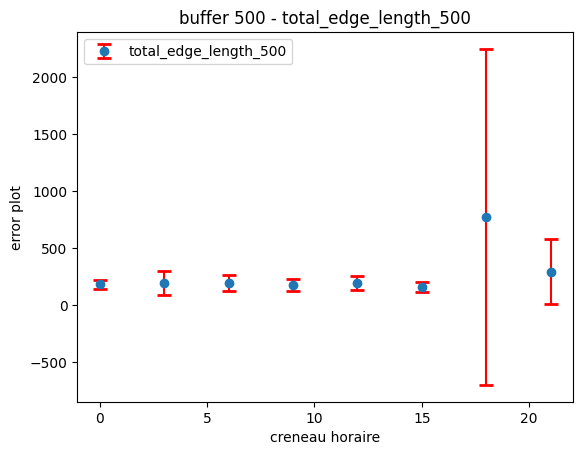

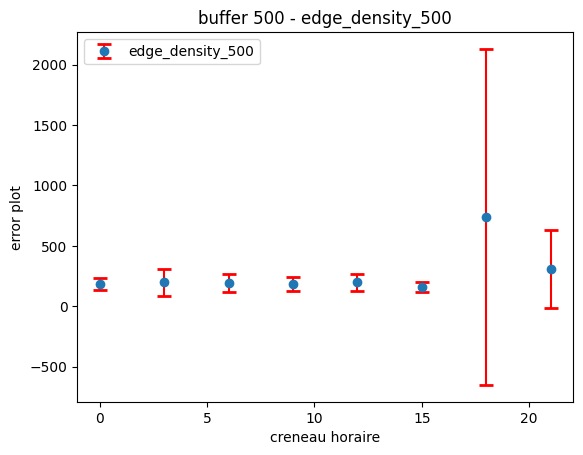

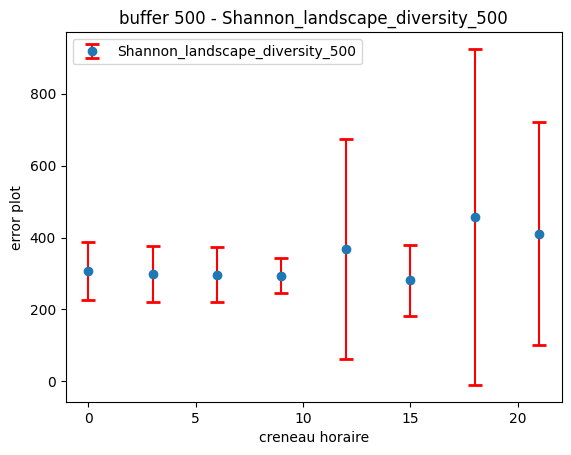

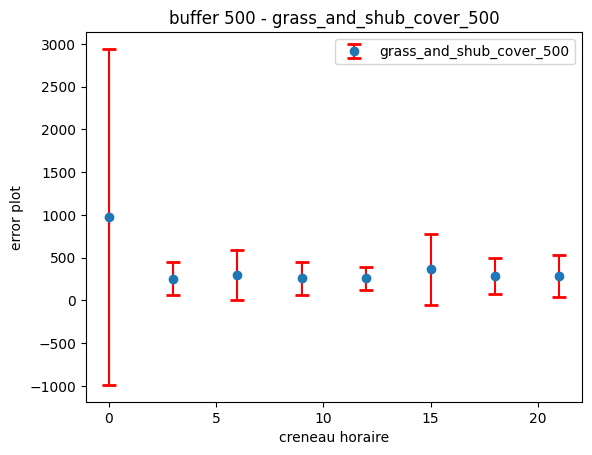

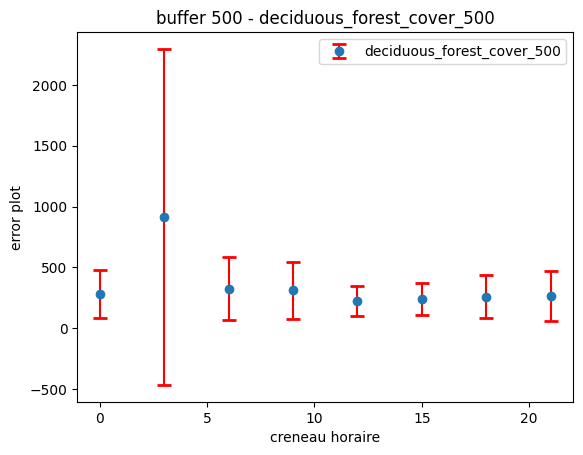

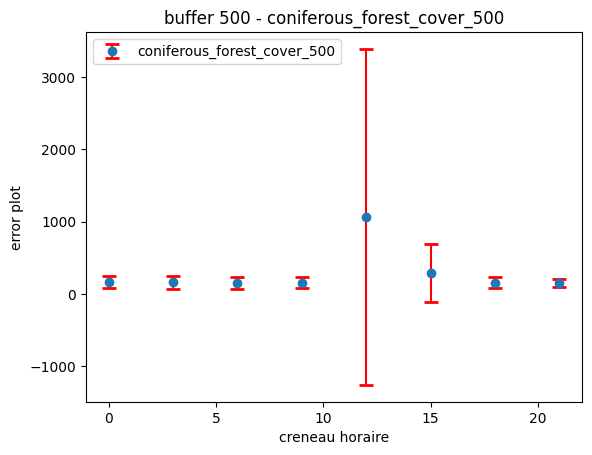

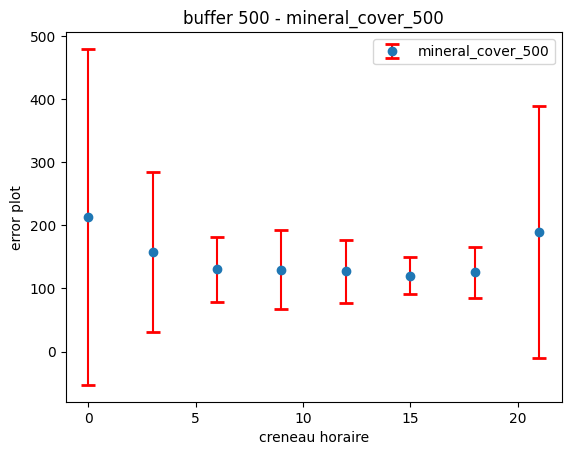

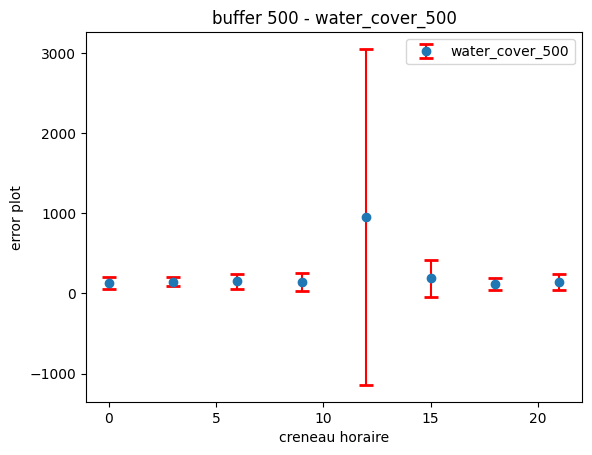

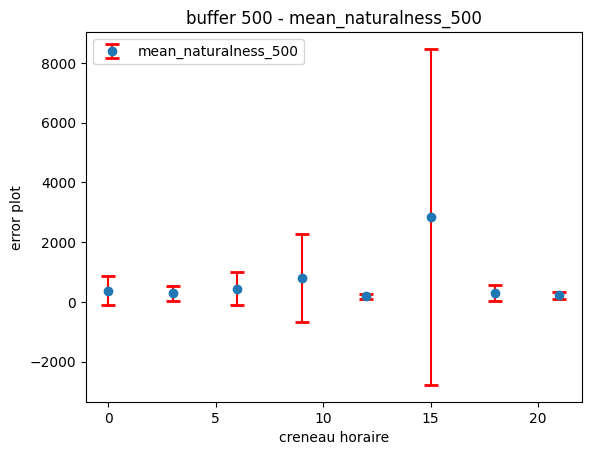

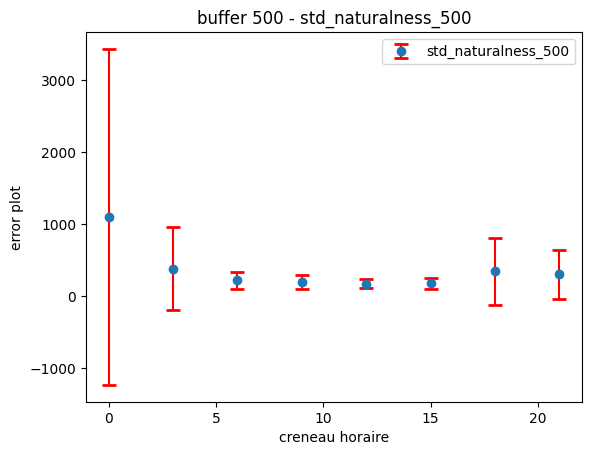

In [23]:
import matplotlib.pyplot as plt

# plages créneaux horaire
x = [0, 3, 6, 9, 12, 15, 18, 21]

# Pour chaque cible, afficher les errors plot pour chaque créneau horaire
for cible in df_cibles.columns:

  # moyenne erreur relative
  y = []

  # intervalle de confiance
  lower_errors = []
  upper_errors = []

  # Pour chaque horaire, obtenir les métriques de la cible
  for value in dic500.values():

    y.append(value[cible][0])
    lower_errors.append(value[cible][0] - value[cible][1][0])
    upper_errors.append(value[cible][1][1] - value[cible][0])


  plt.figure()

  # Plot data points with error bars
  plt.errorbar(x, y, yerr=[lower_errors, upper_errors], label=cible, fmt='o', capsize=5, capthick=2, ecolor='red')

  # Add labels and title
  plt.xlabel('creneau horaire')
  plt.ylabel('error plot')
  plt.title(f'buffer 500 - {cible}')

  plt.legend()

# Show plot
plt.show()

# Longitude et latitude

In [24]:
liste_a_predire = ['LON', 'LAT']

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy import stats

# dictionnaire contenant les métriques de chaque cible pour chaque créneau horaire
dic = {}

# Pour chaque horaire, entraîner un unique modèle sur un paramètre
for cle in dfs:

  print('Horaire :', cle)
  print('==========================================================================')

  # Séparer les prédicteurs des cibles
  df_predicteurs = dfs[cle][liste_predicteurs]
  df_cibles = dfs[cle][liste_a_predire]

  # dictionnaire contenant l'erreur relative moyenne de chaque cible ainsi que l'intervalle de confiance associé
  dico = {}

  for cible in df_cibles.columns:

    # Utiliser un modèle Random Forest
    model = RandomForestRegressor()

    # Cross-validation
    cv_scores = cross_val_score(model, df_predicteurs, df_cibles[cible], cv=5, scoring=custom_scorer)

    # Calcul de l'erreur relative moyenne et de l'écart-type associé
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)

    # Calcul de l'intervalle de confiance (t-distribution)
    confidence_interval = stats.t.interval(0.95, len(cv_scores)-1, loc=mean_score, scale=std_score/np.sqrt(len(cv_scores)))

    dico[cible] = [mean_score, confidence_interval]

    print(cible, [mean_score, confidence_interval])

    print('--------------------------------------------------------------------------------')

  dic[cle] = dico

Horaire : 00
LON [160.23907254937572, (30.223806178320615, 290.2543389204308)]
--------------------------------------------------------------------------------
LAT [1131.1473380792197, (-1292.6185335028215, 3554.913209661261)]
--------------------------------------------------------------------------------
Horaire : 03
LON [149.7110433864794, (45.06863924445494, 254.35344752850384)]
--------------------------------------------------------------------------------
LAT [594.1872874881994, (-533.5812605813599, 1721.9558355577587)]
--------------------------------------------------------------------------------
Horaire : 06
LON [138.83580981277888, (45.51167543248546, 232.1599441930723)]
--------------------------------------------------------------------------------
LAT [261.1636673995915, (-70.04255445875543, 592.3698892579384)]
--------------------------------------------------------------------------------
Horaire : 09
LON [143.77818037763086, (18.923822728204968, 268.63253802705674)]
-

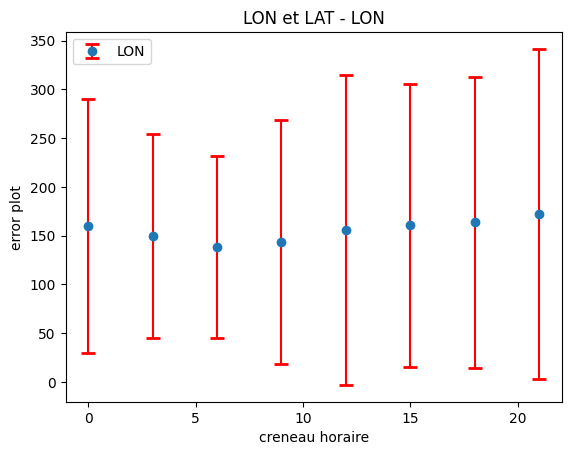

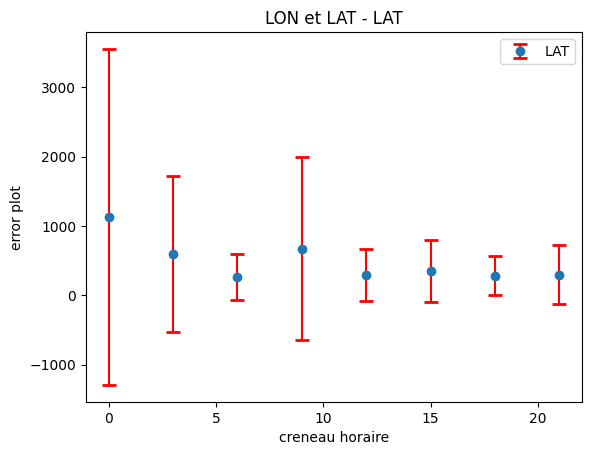

In [26]:
import matplotlib.pyplot as plt

# plages créneaux horaire
x = [0, 3, 6, 9, 12, 15, 18, 21]

# Pour chaque cible, afficher les errors plot pour chaque créneau horaire
for cible in df_cibles.columns:

  # moyenne erreur relative
  y = []

  # intervalle de confiance
  lower_errors = []
  upper_errors = []

  # Pour chaque horaire, obtenir les métriques de la cible
  for value in dic.values():

    y.append(value[cible][0])
    lower_errors.append(value[cible][0] - value[cible][1][0])
    upper_errors.append(value[cible][1][1] - value[cible][0])


  plt.figure()

  # Plot data points with error bars
  plt.errorbar(x, y, yerr=[lower_errors, upper_errors], label=cible, fmt='o', capsize=5, capthick=2, ecolor='red')

  # Add labels and title
  plt.xlabel('creneau horaire')
  plt.ylabel('error plot')
  plt.title(f'LON et LAT - {cible}')

  plt.legend()

# Show plot
plt.show()